In [1]:
import torch
import torchvision
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

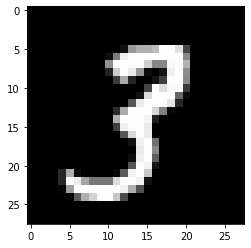

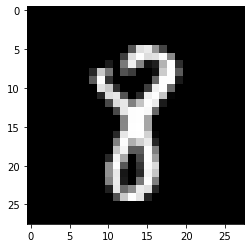

In [20]:
idx3, img3 = random.choice([(i, img) for i, (img, label) in enumerate(mnist_trainset) if label == 3])
idx8, img8 = random.choice([(i, img) for i, (img, label) in enumerate(mnist_trainset) if label == 8])

plt.imshow(img3, cmap="gray")
plt.show()
plt.imshow(img8, cmap="gray")
plt.show()

In [22]:
def show_hist_pair(img):
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.imshow(img, cmap="gray")
    plt.clim(0, 255)
    plt.subplot(122)
    plt.hist(np.array(img).flatten(), range=(0, 255), bins=20)
    plt.show()

def change_range(img, max_val, min_val=0.):
    """ Rescales image value to [0, max_val].
    """
    rescaled = np.array(img) * (max_val - min_val) / 255. + min_val
    return np.rint(rescaled).astype(int)

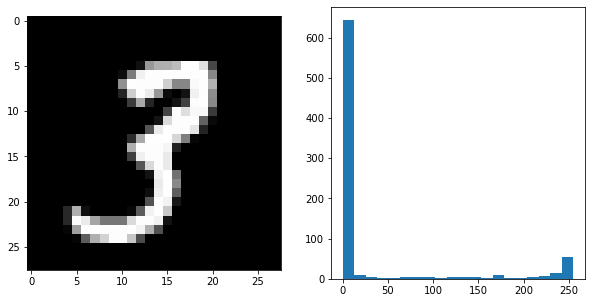

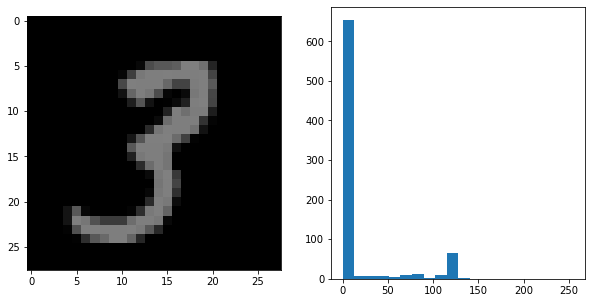

1


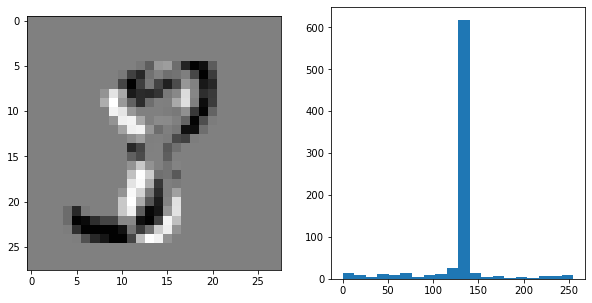

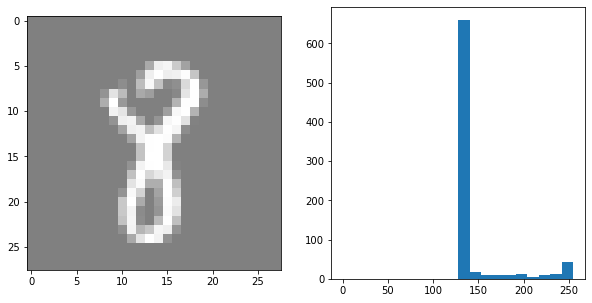

In [28]:
# 3 --> 8
alpha = 0.5
max_val = 255. * alpha

# change range
show_hist_pair(img3)
rescaled3 = change_range(img3, max_val)
show_hist_pair(rescaled3)

# compute difference
rescaled8 = change_range(img8, max_val=255., min_val=rescaled3.max())
difference = np.array(rescaled8) - rescaled3
print(difference.min())
show_hist_pair(difference)

# add the positive portion of differnce
new8 = rescaled3 + difference  # np.maximum(difference, 0)
show_hist_pair(new8)

offset is: 0.0
1


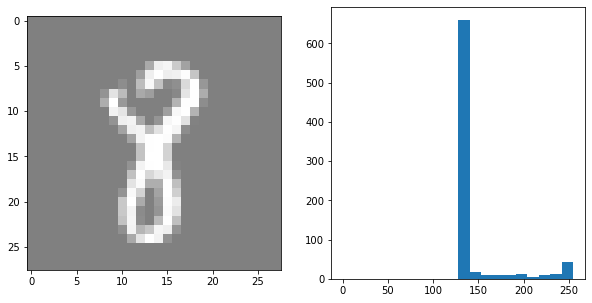

offset is: 20.0
-19


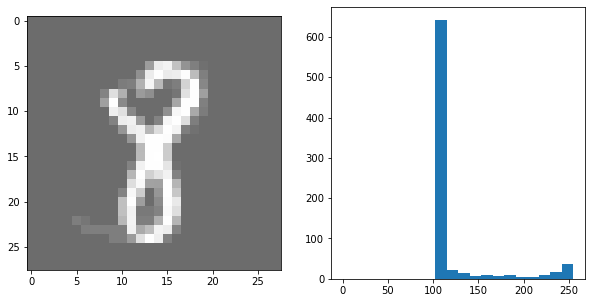

offset is: 40.0
-39


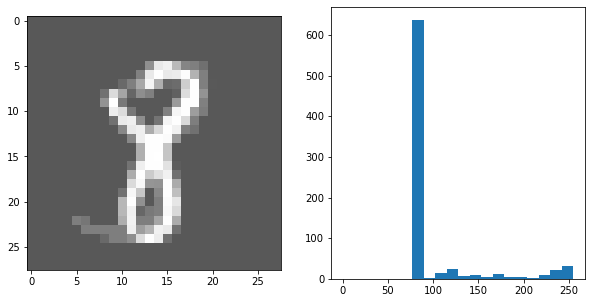

offset is: 60.0
-59


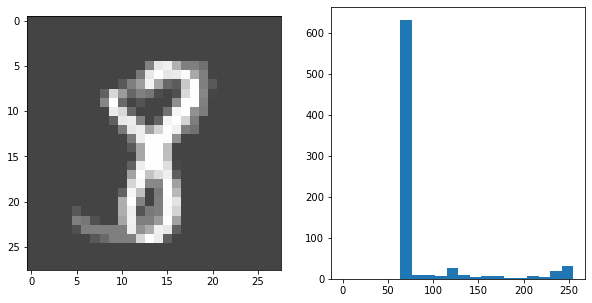

offset is: 80.0
-79


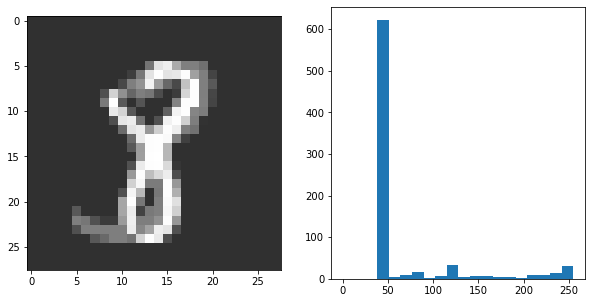

offset is: 100.0
-99


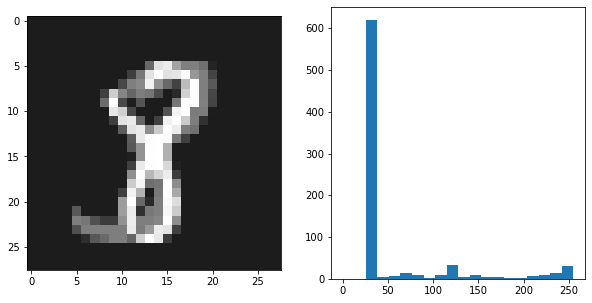

offset is: 120.0
-119


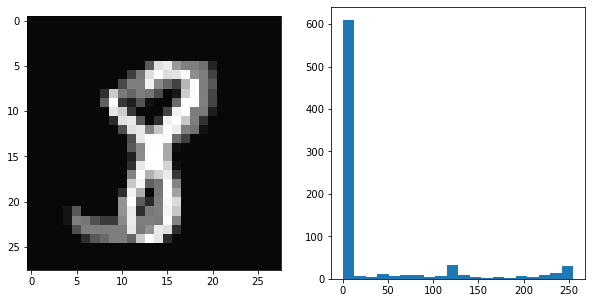

In [31]:
# 3 --> 8
max_val = 255. * alpha

for offset in np.arange(0., max_val, step=20.):
    print("offset is:", offset)
    # change range
    rescaled3 = change_range(img3, max_val)
    rescaled8 = change_range(img8, max_val=255., min_val=rescaled3.max() - offset)
    difference = np.array(rescaled8) - rescaled3
    print(difference.min())
    new8 = rescaled3 + np.maximum(difference, 0)

    show_hist_pair(new8)